## Imports

In [1]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import config
np.random.seed(config.SEED)

df = pd.read_csv(config.DATA_CSV)
df.index = df["contest"].astype(str)+df["problem_name"]
df = df[["problem_statement","problem_tags"]]
df.columns = ["problem_statement","tags"]

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8343 entries, 325A to 1271F
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   problem_statement  8336 non-null   object
 1   tags               8279 non-null   object
dtypes: object(2)
memory usage: 195.5+ KB
None


,problem_statement,tags
325A,You are given n rectangles. The corners of rec...,"implementation,*1500"
325B,Daniel is organizing a football tournament. He...,"binarysearch,math,*1800"
325C,Piegirl has found a monster and a book about m...,"dfsandsimilar,graphs,shortestpaths,*2600"
325D,"In a far away land, there exists a planet shap...","dsu,*2900"
325E,Piegirl found the red button. You have one las...,"combinatorics,dfsandsimilar,dsu,graphs,greedy,..."


## Train test split

In [2]:
# train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(
    df, test_size=0.2, random_state=config.SEED)
print(train.shape, test.shape)
train.tail()

(6674, 2) (1669, 2)


,problem_statement,tags
778B,Bob recently read about bitwise operations use...,"bitmasks,bruteforce,dfsandsimilar,expressionpa..."
552B,Vanya got an important task — he should enumer...,"implementation,math,*1200"
1344D,Uh oh! Applications to tech companies are due ...,"binarysearch,greedy,math,*2700"
1182D,You have given tree consist of $$$n$$$ vertice...,"constructivealgorithms,dfsandsimilar,dp,hashin..."
860C,The All-Berland National Olympiad in Informati...,"greedy,*2200"


## problem_statement

In [3]:
df["problem_statement"].describe()

count                                                  8336
unique                                                 6818
top       The Smart Beaver from ABBYY came up with anoth...
freq                                                     20
Name: problem_statement, dtype: object

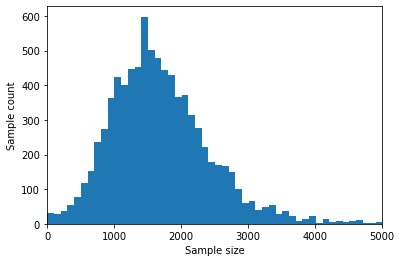

In [4]:
samples = df["problem_statement"].values
plt.hist([len(str(s)) for s in samples], 100)
plt.xlim(0,5000)
plt.xlabel("Sample size")
plt.ylabel("Sample count")
plt.title("")
plt.show()

In [5]:
# from preprocess import preprocess_text
    # remove mathjax stuff with regex
    # https://stackoverflow.com/a/171483/3413574

In [6]:
import re
from preprocess import preprocess_text
text = df.loc["100A","problem_statement"]
print(preprocess_text(text))
print(df.loc["100A","tags"])

df["problem_statement"] = \
    df["problem_statement"].apply(lambda x:preprocess_text(str(x)))

soroush complet area sorush 100th carpet persian contest input want site integ onli put consist write squar celebr rotat side bought befor allow cover length completelyth room yes favorit n1soroush three number singl fine
*specialproblem,implementation,*1100


## Tags

In [7]:
df["tags"].describe()

count                    8279
unique                   4786
top       implementation,*800
freq                      109
Name: tags, dtype: object

In [8]:
from preprocess import clean_tags_column
df["tags"]=df["tags"].apply(clean_tags_column)
df = df[df.tags.str.len()>=1]
df.tail()

,problem_statement,tags
1271B,dont right report want string contain answer b...,"[greedy, math]"
1271C,neighbour even respectivelythen want contain a...,"[bruteforce, geometry, greedy, implementation]"
1271D,import dont even respectivelythen castl smalle...,"[datastructures, dp, greedy, implementation, s..."
1271E,right even contain answer write need otherwis ...,"[binarysearch, combinatorics, dp, math]"
1271F,space obvious data groupsth scienc usual dont ...,[bruteforce]


implementation            2221
math                      2028
greedy                    1950
dp                        1673
datastructures            1290
constructivealgorithms    1181
bruteforce                1173
graphs                     901
binarysearch               786
sortings                   759
Name: tags, dtype: int64


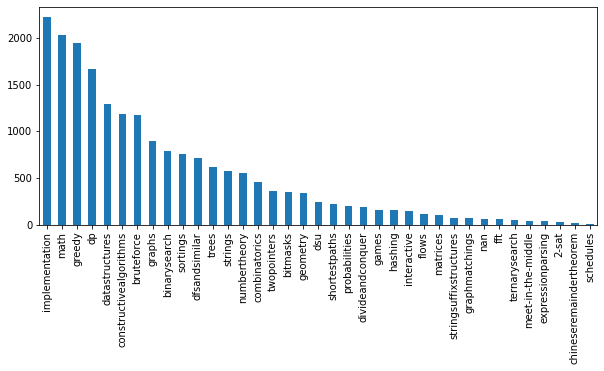

In [12]:
# tag stats
# https://stackoverflow.com/a/71887174/3413574
tag_stats = df["tags"].explode().value_counts()
tag_stats.plot(kind="bar", figsize=(10,4))
print(tag_stats.head(10))

In [10]:
df

,problem_statement,tags
325A,bottom right contain touch otherwis top print ...,[implementation]
325B,specifierprint prefer organ contain exact writ...,"[binarysearch, math]"
325C,piegirl smallest monster contain exact feed wa...,"[dfsandsimilar, graphs, shortestpaths]"
325D,red space day proceed rout bottom right column...,[dsu]
325E,piegirl red deactiv circuit particular modulo ...,"[combinatorics, dfsandsimilar, dsu, graphs, gr..."
...,...,...
1271B,dont right report want string contain answer b...,"[greedy, math]"
1271C,neighbour even respectivelythen want contain a...,"[bruteforce, geometry, greedy, implementation]"
1271D,import dont even respectivelythen castl smalle...,"[datastructures, dp, greedy, implementation, s..."
1271E,right even contain answer write need otherwis ...,"[binarysearch, combinatorics, dp, math]"


## Wordcloud

implementation


TypeError: argument of type 'float' is not iterable

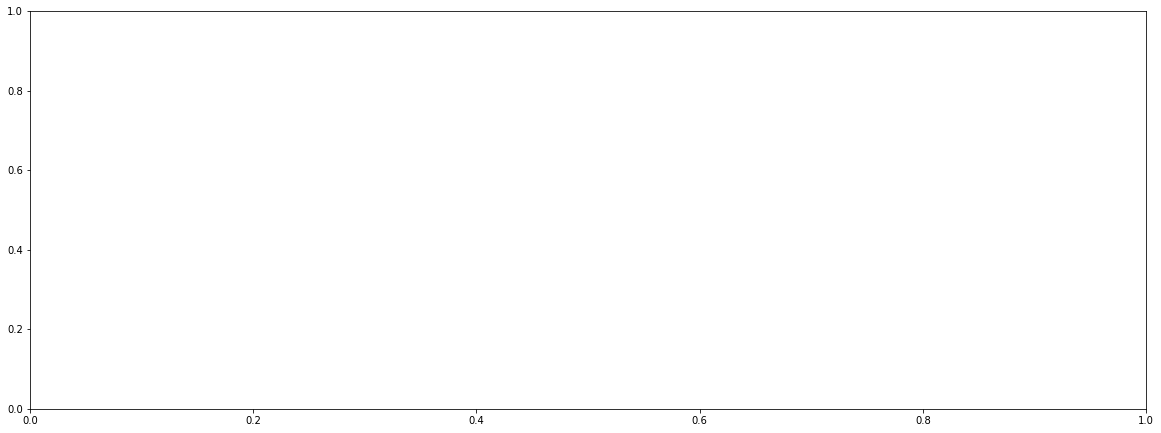

In [11]:
# wordcloud visualization
from wordcloud import WordCloud

def print_wordcloud(tag):
    text = ""
    for idx in train.index:
        if tag in train.loc[idx,"tags"]:
            text+=(str(train.loc[idx,"problem_statement"]))
    # print(dp_text)

    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)
    # Display the generated image:
    # the matplotlib way:
    plt.title(tag)
    plt.imshow(wordcloud)
    plt.axis("off")

import matplotlib.pyplot as plt
plt.figure(figsize=(20,60))
tags = "implementation math greedy dp bruteforce graphs binarysearch".split()
for i,tag in enumerate(tags):
    print(tag)
    plt.subplot(7,1,i+1)
    print_wordcloud(tag)

In [ ]:
train.to_pickle(config.TRAIN)
test.to_pickle(config.TEST)

In [ ]:
# !pip install wordcloud

In [ ]:
print_wordcloud("math")

## eda+performance improvement for tag:implementation

In [ ]:
imple = train.copy()
print(imple.iloc[0])
imple[["implementation"]] = 1
for idx in imple.index:
    if "implementation" not in imple.loc[idx,"tags"]:
        imple.loc[idx,"implementation"] = 0

imple = imple[["problem_statement","implementation"]]
imple

In [ ]:
imple_train, imple_test = train_test_split(
    imple, test_size=0.2, random_state=config.SEED)
imple_train.tail()

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=config.MAX_FEATURES)
xvect = vectorizer.fit_transform(imple_train["problem_statement"].tolist())
xvecttest = vectorizer.fit_transform(imple_test["problem_statement"].tolist())

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LinearRegression
clf =  OneVsRestClassifier(LinearRegression())
clf.fit(xvect,imple_train[["implementation"]])
ypred = clf.predict(xvecttest)

# baseline 0.6900398406374502
from sklearn.metrics import accuracy_score
accuracy_score(ypred,imple_test[["implementation"]])


In [ ]:
from sklearn.cluster import KMeans
n_clusters=10
model = KMeans(n_clusters)
model.fit(xvect) # vectorized matrix

In [ ]:
# distribution between clusters
# number of articles per cluster
model.labels_
import collections
df = pd.DataFrame(collections.Counter(model.labels_),
    columns=range(0,n_clusters),index=[1]).T
df.plot(kind="bar",legend=False,
    title="number of problems per cluster")

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(n_clusters):
    top_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_words)))
